**Vivian Nguyen**

Spring 2023

CS 251: Data Analysis and Visualization

Project 5: Clustering

In [66]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd
import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

Text(0, 0.5, 'y')

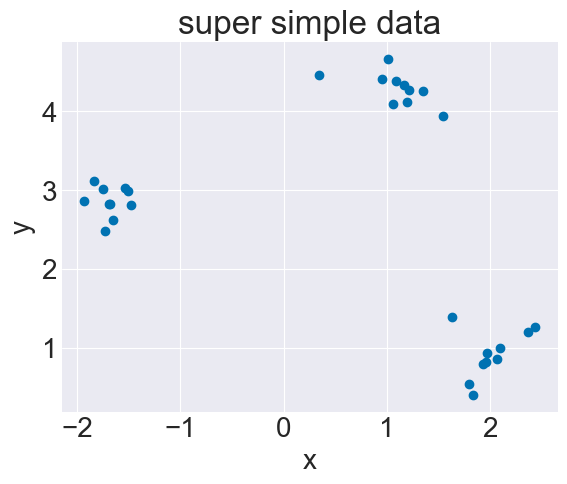

In [67]:
super_simple= pd.read_csv('data/super_simple.csv', sep =',').to_numpy()
plt.scatter(super_simple[:,:1], super_simple[:,1:2])
plt.title('super simple data')
plt.xlabel('x')
plt.ylabel('y')

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$

for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [68]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [69]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [70]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [71]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [72]:
test_k = 3
init_centroids = cluster.initialize(test_k)

print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `update_labels`

In [73]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])


new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first update data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids` (1/2)

In [74]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')
print('\nYou should see:')
print('''After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]
''')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]

You should see:
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]



#### Test `update_centroids` (2/2)

Test special case when no sample gets assigned to one of the clusters.

In [75]:
np.random.seed(0)

print('Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.')
print('There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.')
print(100*'-')
test_k_2 = 5
new_labels_2 = new_labels.copy()
new_labels_2[new_labels_2 == 2] = 3
init_centroids_2 = np.vstack([init_centroids, np.random.random(size=(2, 2))])
new_centroids_2, diff_from_prev_centroids_2 = cluster.update_centroids(test_k_2, new_labels_2, init_centroids_2)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids_2}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids_2}')

Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.
There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.
----------------------------------------------------------------------------------------------------
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [-1.6855   2.8272 ]
 [ 2.00717  0.9184 ]
 [ 1.1924   4.1182 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [-3.4786   2.2845 ]
 [ 1.45836  0.20321]
 [ 0.58964  3.57332]]


You should see: 
    
    After the first centroid update, your cluster assignments are:
    [[ 1.09087  4.29295]
    [-1.68133  2.85917]
    [some_float  some_float ]
    [ 2.00717  0.9184 ]
    [some_float  some_float ]]
    Your difference from previous centroids:
    [[ 0.75287 -0.17425]
    [ 0.15877 -0.25313]
    [some_float  some_float ]
    [some_float  some_float]
    [some_float  some_float]]

**NOTE:** Each `some_float` above should be a different random float value and not `nan` or all `0`s.

#### Test `inertia`

In [76]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot showing the cluster assignments of the data in different colors. Nearby samples in your scatterplot should have the same color most of the times that you run your code (*this may not be true **every** time you run your code to generate the plot and that is expected! You are aiming for most of the time.*). Here is an example:

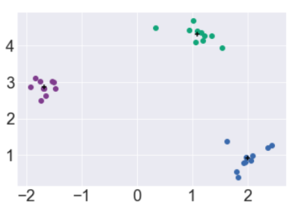

Total iterations:  2


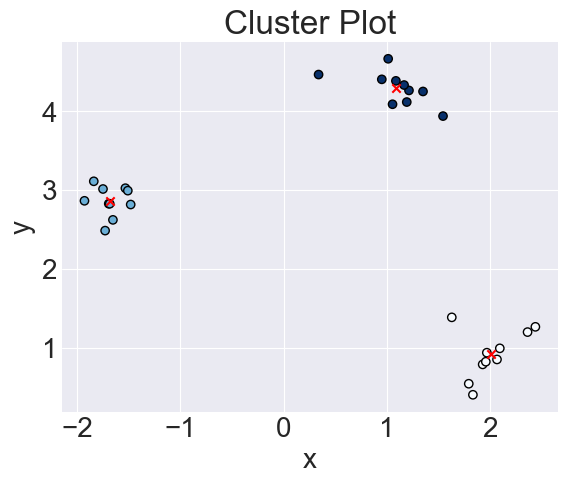

In [78]:
cluster.cluster(3)
cluster.plot_clusters()


### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

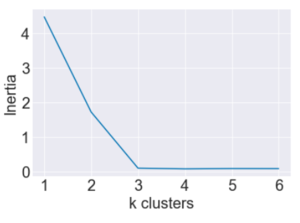

Total iterations:  2
Total iterations:  2
Total iterations:  3
Total iterations:  2
Total iterations:  2
Total iterations:  2


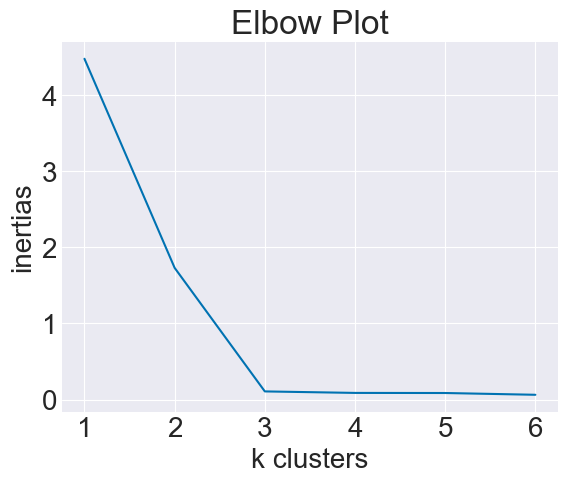

In [91]:
cluster.elbow_plot(6)

**Answer 1:** 
3 clusters based on elbow plot, but the elbow plot does change drastically each time you run it. The best and more common number of clusters is 3.

#### 1d) Clustering the `five_blobs` dataset

Load in the `five_blobs` dataset then in the cell below:
- create a scatterplot showing the 2D dataset (without any clustering).
- run K-means to cluster the dataset with a reasonable number of clusters (based on what you observe in the scatterplot).
- create a scatterplot showing the clustered data.

Total iterations:  5


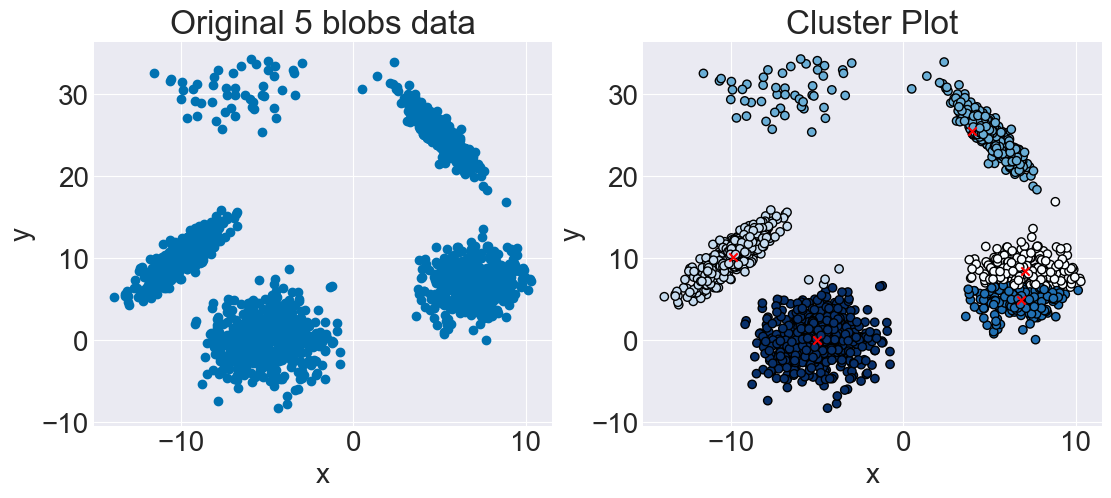

Total iterations:  2
Total iterations:  8
Total iterations:  5
Total iterations:  3
Total iterations:  4
Total iterations:  4
Total iterations:  2
Total iterations:  4
Total iterations:  6
Total iterations:  2


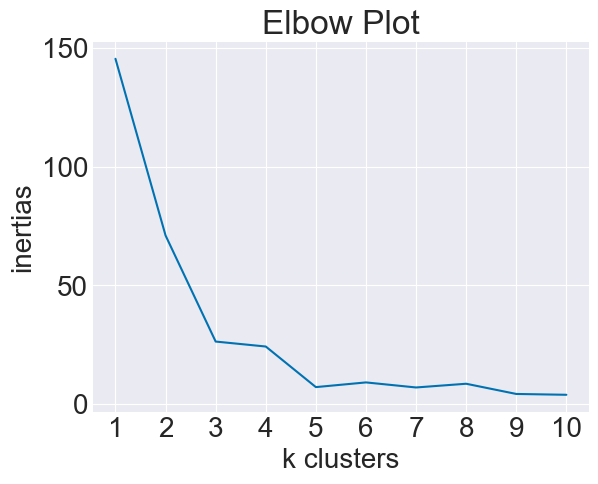

In [80]:
five_blobs= pd.read_csv('data/five_blobs.csv', sep =',').to_numpy()
cluster_five = kmeans.KMeans(five_blobs)

plt.subplots_adjust(bottom=0.1, right=1.7, top=0.9)
plt.subplot(121)
plt.scatter(five_blobs[:,0], five_blobs[:,1])
plt.title('Original 5 blobs data')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(122)

# place me before you cluster the dataset
np.random.seed(0)
cluster_five.cluster(5)
cluster_five.plot_clusters()


cluster_five.elbow_plot(10)

#### Questions

**Question 2:** Run K-means and make the above scatterplot showing the clusters at least 5 times, changing the random seed value each time (e.g. with `np.random.seed(0)`, `np.random.seed(1)`, etc.). What do you observe about how the cluster assignments match up with the clusters that you see visually? **Why does this happen?**

**Question 3:** Have your code in above the cell also generate an elbow plot with `k` running from 1 to 10. As you change the random seed, how predictive is the elbow plot of the number of clusters in the dataset? In order words, if you had to only rely on the elbow plot to determine the number of clusters (without looking at the scatterplot), how often would you be correct? **Explain your reasoning.**

**Answer 2:** 
The seeds pre-determine the clusters and where the centroids will end up. For example, if I ran np.random.seed(3) 5 times, the clusters would be the exact same each time. This happens because the seed value is a pre-determination of the 'randomness' of the clustering algorithm. np.random.seed(4) yields the best results visually. The other seed values do not perform as well, often placing two clusters where there should be one visually. This happens because of how the seed values will not change the results as you run them from time to time because they have already determined what the clusters will look like.

The cluster assignments are also different because they are dependent on the intial conditions and those are different every single time the method is ran. 

**Answer 3:** 
The elbow plot is accurate in determining the number of clusters 1/6 times after running the seed method with values from 0-5. It is only accurate when the seed value is 4. The elbow plot only indicated that 5 clusters should be chosen when the seed was 4, and all of the other seed values led to 4 clusters.

#### Run K-means multiple times, save the best clustering

To address what you observed above, we can run K-means multiple times and take the best results to determine the final clustering. Implement `cluster_batch` to run K-means multiple times with a chosen $k$ value.

In the cell below, run `cluster_batch` with 10 iterations for every $k$ value and make a new scatterplot of the cluster assignments.

Total iterations:  5
Total iterations:  3
Total iterations:  6
Total iterations:  3
Total iterations:  4
Total iterations:  4
Total iterations:  3
Total iterations:  4
Total iterations:  4
Total iterations:  3


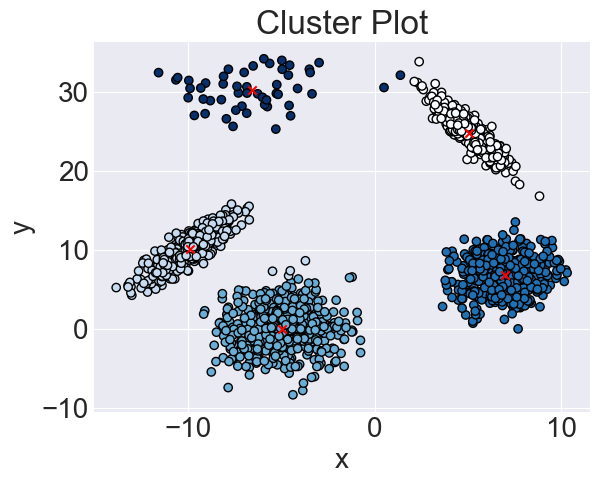

In [81]:
# place me before you batch cluster the dataset
np.random.seed(0)

plt.subplot()
cluster_five.cluster_batch(5,10)
# print(cluster_five.get_centroids())
cluster_five.plot_clusters()

**Question 4:** In way ways (if any) did the clustering improve? **Why?**

**Answer 4:** 
The clustering did improve. Visually, the five clusters that the algorithm chose are well-centered to the data. Also, the centroids are more centered in their respective clusters. The centroid labels and the centroids both improved.

### 1e) Update elbow plot for the `five_blobs` dataset

Now that you have experimented with `cluster` and `cluster_batch`, update your `elbow_plot` method to use `cluster_batch` instead of `cluster`. To do this, add a keyword argument `n_iter` to `elbow_plot`. Give it a default value of 1. (*And don't forget to update the docstring to include the new parameter!*)

In the cell below, test out your updated `elbow_plot` method using the same max $k$ value and number of iterations (for each $k$ value) as you used above. Create an elbow plot showing the inertia with different $k$ values.

Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  9
Total iterations:  3
Total iterations:  6
Total iterations:  6
Total iterations:  4
Total iterations:  5
Total iterations:  4
Total iterations:  3
Total iterations:  4
Total iterations:  6
Total iterations:  3
Total iterations:  5
Total iterations:  5
Total iterations:  2
Total iterations:  3
Total iterations:  3
Total iterations:  5
Total iterations:  3
Total iterations:  5
Total iterations:  4
Total iterations:  3
Total iterations:  3
Total iterations:  2
Total iterations:  4
Total iterations:  4
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  4
Total iterations:  3
Total iterations:  4
Total iterations:  2
Total iterations:  5
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterations:  2
Total iterati

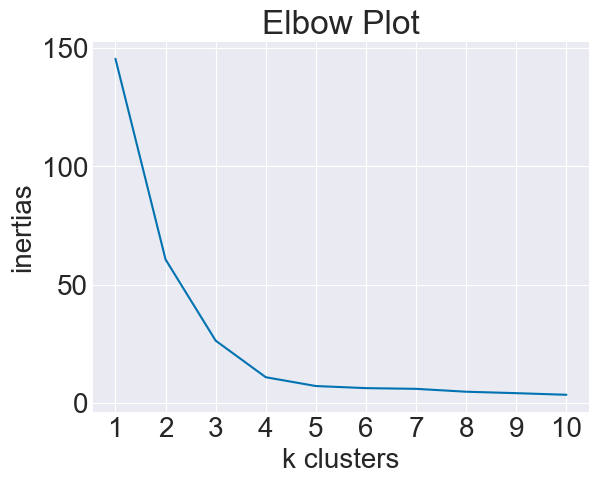

In [82]:
cluster_five.elbow_plot(10,10)

**Question 5:** How predictive is the updated elbow plot of the number of clusters in the dataset compared to the previous ones that you made?

**Answer 5:** 
This elbow plot is more predictive than the previous one. In the other ones, most of the elbow plots incorrectly predicted how many k clusters would represent the data well. They mostly said 4 clusters. This one correctly guesses that the data should contain 5 clusters, so it is better for predictivity.

## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

(-0.5, 302.5, 201.5, -0.5)

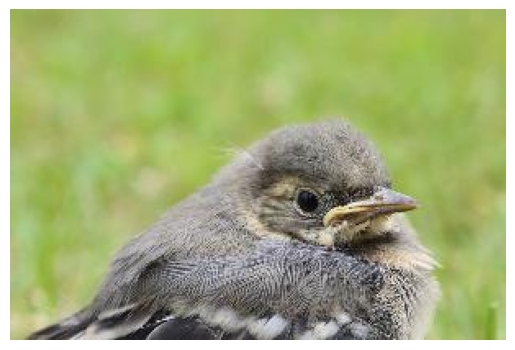

In [83]:
from matplotlib.image import imread
pic = imread('data/baby_bird.jpg')
plt.imshow(pic)
ax = plt.gca()
ax.axis('off')

### 2b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [84]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    
    num_rows = img.shape[0]
    num_cols = img.shape[1]

    flattened = img.reshape((num_rows*num_cols, img.shape[2]))
    return flattened
    pass

print(pic.shape)
baby_bird = flatten(pic)
print(baby_bird.shape)


(202, 303, 3)
(61206, 3)


### 2c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [85]:
cluster_bird = kmeans.KMeans(baby_bird)

# cluster_bird.cluster_batch()
cluster_bird.cluster(5, max_iter=5)


cluster_bird.replace_color_with_centroid()

Total iterations:  5
[0 0 0 ... 2 2 2]


In [86]:
print(cluster_bird.centroids)

[[148.33134 164.67518  92.9156 ]
 [ 83.52966  79.51665  75.43775]
 [175.85357 190.90091 122.80106]
 [179.79455 176.57724 170.03266]
 [163.84141 186.66649  97.3088 ]]


### 2d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

[[148 164  92]
 [148 164  92]
 [148 164  92]
 ...
 [175 190 122]
 [175 190 122]
 [175 190 122]]


(-0.5, 302.5, 201.5, -0.5)

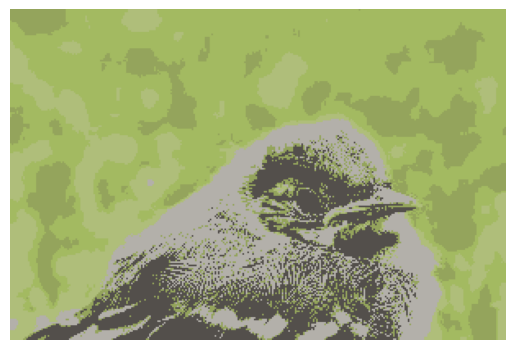

In [87]:
bird_processed=cluster_bird.get_data()
print(bird_processed)
bird_processed = bird_processed.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(bird_processed)
ax = plt.gca()
ax.axis('off')

### 2e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

Total iterations:  5
[4 4 4 ... 3 3 3]


(-0.5, 991.5, 991.5, -0.5)

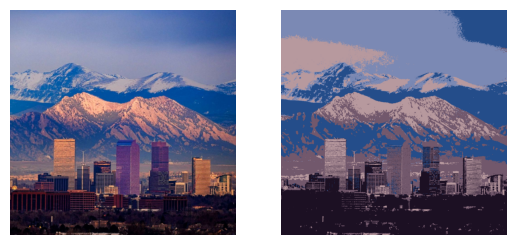

In [88]:

den_pic = imread('data/denver.jpg')
plt.subplot(121)
plt.imshow(den_pic)
ax = plt.gca()
ax.axis('off')

denver = flatten(den_pic)
den_cluster = kmeans.KMeans(denver)
den_cluster.cluster(5, max_iter=5)


den_cluster.replace_color_with_centroid()
den_processed=den_cluster.get_data()

den_processed = den_processed.reshape(den_pic.shape[0], den_pic.shape[1], den_pic.shape[2])
plt.subplot(122)
plt.imshow(den_processed)
ax = plt.gca()
ax.axis('off')

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. silhouette score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

### 6) Leader algorithm

- Implement the leader algorithm and compare clustering results and runtime with K-means on datasets of your choice.